<a href="https://colab.research.google.com/github/serivan/mldmlab/blob/master/Install_R_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

See [here](https://colab.research.google.com/drive/1_MmJuotDr9izNwivjgfD1J_bd4OvTFLq) for installing R + brms.

## Setup

Run the following commands once (~2-3 mins).  It will replace your python2 jupyter kernel by R kernel.

Then, go to menu **Runtime -> Manage Sessions -> TERMINATE**.  

Finally, **RECONNECT**.

In [0]:
!apt-get install libssl-dev > /dev/null
!wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x ./Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -b -p /conda  > /dev/null 2>&1 
!/conda/bin/conda install -c r r-rstan r-irkernel gxx_linux-64 -y -q > /dev/null 2>&1
!/conda/bin/R -e "IRkernel::installspec(name = 'python2', displayname = 'R', user = FALSE)"  > /dev/null 2>&1
!mkdir /root/.R/
!echo "CXX14FLAGS=-O3 -mtune=native -march=native -Wno-ignored-attributes -Wno-deprecated-declarations" > /root/.R/Makevars
import os
os._exit(00)


--2019-03-14 17:20:57--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69826864 (67M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  66.59M  96.2MB/s    in 0.7s    

2019-03-14 17:20:58 (96.2 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [69826864/69826864]



## R Code


In [1]:
Sys.setenv(PATH= paste("/conda/bin" , Sys.getenv("PATH"), sep = ":" ) )
install.packages('codetools', repos='http://cran.rstudio.com/')
options(repr.plot.width  = 3,
        repr.plot.height = 3)
Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


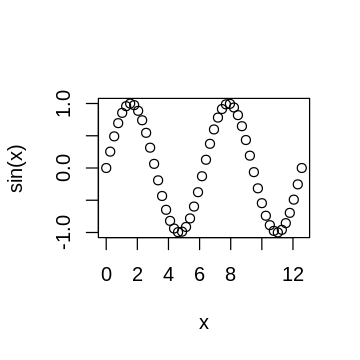

In [3]:
x <- seq(0, 4*pi, length.out=50)
plot(x, sin(x))

In [4]:
stanmodelcode <- "
data {
    int<lower=0> N; 
    real y[N];
}

parameters {
    real mu; 

}

model {
    target += normal_lpdf(mu | 0, 10);
    target += normal_lpdf(y | mu, 1);
}"

y <- rnorm(20)
dat <- list(N = 20, y = y);

fit <- stan(model_code = stanmodelcode, model_name = "example",
            data = dat, iter = 2012, chains = 8, sample_file = 'norm.csv',
            verbose = FALSE,
            refresh = -1)

print(fit)

Inference for Stan model: example.
8 chains, each with iter=2012; warmup=1006; thin=1; 
post-warmup draws per chain=1006, total post-warmup draws=8048.

       mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu     0.29    0.00 0.23  -0.16   0.14   0.29   0.44   0.74  2961    1
lp__ -32.47    0.01 0.72 -34.46 -32.63 -32.20 -32.02 -31.97  3921    1

Samples were drawn using NUTS(diag_e) at Thu Mar 14 17:25:58 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


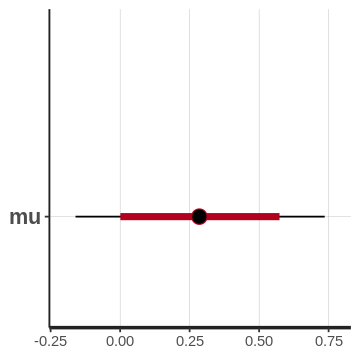

In [5]:
plot(fit)

In [6]:
y <- as.matrix(read.table('https://raw.github.com/wiki/stan-dev/rstan/rats.txt', header = TRUE))
x <- c(8, 15, 22, 29, 36)
xbar <- mean(x)
N <- nrow(y)
T <- ncol(y)
rats_fit <- stan(file = 'https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan')


Warning message in normalizePath(file):
“path[1]="https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan": No such file or directory”

In [7]:
rats_fit

Inference for Stan model: rats.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                 mean se_mean    sd    2.5%     25%     50%     75%   97.5%
alpha[1]       239.94    0.04  2.63  234.74  238.22  239.90  241.72  244.98
alpha[2]       247.76    0.04  2.70  242.46  245.89  247.76  249.58  253.02
alpha[3]       252.42    0.04  2.71  247.16  250.63  252.39  254.18  257.94
alpha[4]       232.56    0.04  2.67  227.33  230.76  232.56  234.30  237.94
alpha[5]       231.57    0.04  2.65  226.22  229.87  231.62  233.32  236.76
alpha[6]       249.72    0.04  2.66  244.52  247.93  249.72  251.49  254.94
alpha[7]       228.68    0.04  2.72  223.22  226.86  228.66  230.49  234.01
alpha[8]       248.37    0.04  2.66  243.02  246.62  248.38  250.13  253.66
alpha[9]       283.31    0.04  2.69  277.96  281.48  283.30  285.12  288.53
alpha[10]      219.23    0.04  2.68  214.16  217.44  219.19  220.98  224.60
alpha[11]     

'pars' not specified. Showing first 10 parameters by default.
ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


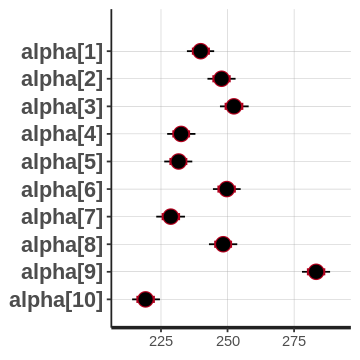

In [8]:
plot(rats_fit)

In [9]:
install.packages('recommenderlab', repos='http://cran.rstudio.com/')


also installing the dependencies ‘arules’, ‘proxy’, ‘registry’, ‘irlba’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
library("recommenderlab") 

Loading required package: Matrix
Loading required package: arules

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: proxy

Attaching package: ‘proxy’

The following object is masked from ‘package:Matrix’:

    as.matrix

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix

Loading required package: registry
